<a href="https://colab.research.google.com/github/RonKG/Craigslist-Cars-For-Sale-Data-Project/blob/main/Craigslist%20Cars%20For%20Sale%20Data%C2%A0Project%20Part%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##
#1 - go to car postings pages
#2 - for each page, go to the url for each post
#3 - on each car page, grab all the car attributes on the bottom left quadrant
#4 - append to dataframe
#5 - perform cleaning steps
#6 - visualize
##

# <font color='red'> Import libraries </font>

In [ ]:
# work with dataframes
import pandas as pd
import numpy as np

# we'll use this to store the a dataframe to csv at a later stage
import csv

# make HTTP requests to a specified URL
import requests

# web scraping library
from bs4 import BeautifulSoup

# time management
import time
from random import randint
# from collections import Counter

# regular expressions
import re

In [ ]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

# Set the default color cycle for charts
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["r", "#e94cdc", "0.7"]) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#### Use BeautifulSoup to scrape Craigslist DFW Used Cars

In [ ]:
# a link to each vehicle post will be stored here
links = []

#  all pages in a city will be stored in this list
list_of_cities = []

# list of city names we want to get data for
cities = ['dallas','chicago', 'newyork', 'sfbay', 'losangeles', \
        'houston', 'phoenix', 'philadelphia', 'sanantonio', 'washingtondc',\
       'boston', 'nashville', 'atlanta', 'miami', 'seattle']


for city in cities:
    # each city has approxiamtely 1800 pages for the "cars for sale by owner" category
    # we'll keep track of these pages with page_number variable below
    page_number = 1

    # this while loop cycles through all 1800 pages
    while page_number <= 1800:
        # city_link variable takes a a different city name from the cities every time through the loop
        city_link = "https://" + str(city) + ".craigslist.org/d/cars-trucks-by-owner/search/cto?s=" + \
                                str(page_number) + "&hasPic=1"

        # we                         
        list_of_cities.append(city_link)
        page_number +=120

# URLs counter
car_urls = 1      
for each_city_page in list_of_cities:
    links_in_each_city_page = requests.get(each_city_page)
    # parse html object from page to BS object
    soup = BeautifulSoup(links_in_each_city_page.content, 'html.parser')

    try:
        #get the macro-container for the car posts for that page
        posts = soup.find_all('a', class_= 'result-image gallery')

        # get all the html links in the page and append them to a list
        for link in posts:
            l = link.get('href')
            links.append(l)
                
    except:
        pass

    # this code just helps us keep count of the looping progress                     
    if car_urls % 5 == 0:
        city_link = l.strip()
        start = city_link.find("//") + len("//")
        end = city_link.find(".")
        city_string = city_link[start:end]
        print('Number of pages returned --> ' + str(car_urls) + '---' + city_string)

    # we add a sleep timer to manage our server requests
    time.sleep(randint(0,1))
    car_urls +=1

Number of pages returned --> 5---dallas
Number of pages returned --> 10---dallas
Number of pages returned --> 15---dallas
Number of pages returned --> 20---chicago
Number of pages returned --> 25---chicago
Number of pages returned --> 30---chicago
Number of pages returned --> 35---newyork
Number of pages returned --> 40---newyork
Number of pages returned --> 45---newyork
Number of pages returned --> 50---sfbay
Number of pages returned --> 55---sfbay
Number of pages returned --> 60---sfbay
Number of pages returned --> 65---losangeles
Number of pages returned --> 70---losangeles
Number of pages returned --> 80---houston
Number of pages returned --> 85---houston
Number of pages returned --> 90---houston
Number of pages returned --> 95---phoenix
Number of pages returned --> 100---phoenix
Number of pages returned --> 105---phoenix
Number of pages returned --> 110---philadelphia
Number of pages returned --> 115---philadelphia
Number of pages returned --> 120---philadelphia
Number of pages re

In [ ]:
# save links to csv
df = pd.DataFrame(links)
df.to_csv("./links.csv", sep=',',index=False)

In [ ]:
# read links from csv
links = pd.read_csv('./links.csv',names=['https'])
links = links['https'][1:]
print("links returned --> " , len(links))
links

links returned -->  225


1      https://dallas.craigslist.org/d/cars-trucks-by...
2      https://dallas.craigslist.org/d/cars-trucks-by...
3      https://dallas.craigslist.org/d/cars-trucks-by...
4      https://dallas.craigslist.org/d/cars-trucks-by...
5      https://dallas.craigslist.org/d/cars-trucks-by...
                             ...                        
221    https://Seattle.craigslist.org/d/cars-trucks-b...
222    https://Seattle.craigslist.org/d/cars-trucks-b...
223    https://Seattle.craigslist.org/d/cars-trucks-b...
224    https://Seattle.craigslist.org/d/cars-trucks-b...
225    https://Seattle.craigslist.org/d/cars-trucks-b...
Name: https, Length: 225, dtype: object

In [ ]:
# justa counter
count = 0

# store vehicle details in this list
cars = []

#loop over all links in the list    
for link in links:
    # make HTTP requests
    each_page = requests.get(link)
    # The sleep function can help you to avoid the server to be overloaded with too many requests in a very short period of time.
    time.sleep(randint(1,2))
    # store the BS object in a variable
    page_soup = BeautifulSoup(each_page.content, 'html.parser')

    # loop over each link and store car details
    car_details = []
    try:
        # find price attribute and store in car details
        car_details.append(page_soup.find('span', class_="price").text)

        # find date time and append to car details
        for span in page_soup.find_all('span', recursive=True):
            if not span.attrs.values():
                car_details.append(span.text)
        car_details.append("date time: " + page_soup.find('time', class_="date timeago")\
                                         .text.strip().replace(':',';'))

        # find date city name and append to car details
        city = link.strip()
        start = city.find("//") + len("//")
        end = city.find(".")
        substring = city[start:end]
        car_details.append('city:' + substring)

        # find geo coordinates and append to car details
        geos = page_soup.findAll("div", {"class": "mapbox"})
        lat = geos[0].contents[1].get('data-latitude')
        car_details.append('lat:' + lat.strip())
        long = geos[0].contents[1].get('data-longitude')
        car_details.append('long:' + long.strip())

        # find post body and append to car details
        post_body = page_soup.find(attrs={'id' : 'postingbody'}).contents[2]
        # remove non ascii characters from post bosy
        car_details.append('post_body:' + re.sub("[^0-9a-zA-Z]+", " ", post_body))

        # find postID and append to car details / We'll use this to assign labels to images later
        car_details.append('pID:' + link.strip().replace('html','').replace('.','').split('/')[-1])
    except:
        pass    
    
    # perform some basic cleanup and store in clean
    clean = []
    for string in car_details:
        # this attribute came without a label. Assign one.
        if string == car_details[1]:
            clean.append('year make model: ' + string)
        # clean up price text from $9,999 --> 9999
        if string == car_details[0]:
            clean.append('price: ' + string.replace(',','').replace('$',''))
        else:
            clean.append(string)

            
    # some attributes came without labels. Drop those.
    car_final = []
    for s in clean:
        if ':' in s:
            car_final.append(s)
            
    # append clean attributes for each vehicle to car list
    cars.append(car_final)
    count += 1

    # just a counter to keep track of the loop
    if count % 100 == 0:
        print('loop # -> ',count)

In [ ]:
# method to strip() the keys and values after splitting in order to trim white-space.
def list_to_dict(rlist):
    return dict(map(lambda s : map(str.strip, s.split(':')), rlist))



# create a dictionary for label:value for each car attribute
car_dicts = []
for car in cars:
    car_dict = list_to_dict(car)
    car_dicts.append(car_dict)

In [ ]:
# create an Empty DataFrame object
dfs = pd.DataFrame()

for item in car_dicts:
    df = pd.DataFrame.from_dict(item,orient='index').transpose()
    #concatenate each new df from the loop into the parent df
    dfs= pd.concat([dfs,df], axis=0, ignore_index=True, sort=True)
    #clean duplicate year in 'year make model'
    dfs['year_c make model'] = dfs['year make model'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1', regex=True)

In [ ]:
dfs.to_csv('car_data.csv', sep='\t', encoding='utf-8')
dfs.to_csv('B:/DS/car_data.csv', sep='\t', encoding='utf-8')

#  <font color='red'> Load data and perform additional cleaning </font>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/car_data.csv', sep='\t', engine='python')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(3)
dfs= df

In [ ]:
dfs['year'] = dfs['year_c make model'].str.split(' ').str[0].str.upper()
dfs['make'] = dfs['year_c make model'].str.split(' ').str[1].str.upper()
dfs['model'] = dfs['year_c make model'].str.split(' ').str[2].str.upper()
dfs['date'] = dfs['date time'].str.split(' ').str[0]
dfs['time'] = dfs['date time'].str.split(' ').str[1].str.replace(';',':')
dfs['date time'] = dfs['date time'].str.split(' ').str[1].str.replace(';',':')
dfs.head(3)

,VIN,city,condition,cylinders,date time,drive,fuel,lat,long,odometer,...,title status,transmission,type,year make model,year_c make model,year,make,model,date,time
0,NaN,dallas,excellent,8 cylinders,23:08,fwd,gas,32.825721,-97.481600,2200,...,salvage,automatic,SUV,2007 Lincoln navigator,2007 Lincoln navigator,2007,LINCOLN,NAVIGATOR,2021-09-24,23:08
1,KL8CB6SA9HC828034,dallas,good,4 cylinders,23:05,fwd,gas,32.748117,-97.076575,105119,...,clean,automatic,NaN,2017 chevy spark ls,2017 chevy spark ls,2017,CHEVY,SPARK,2021-09-24,23:05
2,NaN,dallas,NaN,NaN,22:53,NaN,gas,32.604100,-96.865300,131913,...,clean,automatic,NaN,2010 Nissan Xterra SE 4x4,2010 Nissan Xterra SE 4x4,2010,NISSAN,XTERRA,2021-09-24,22:53


In [ ]:
dfs['date time'] = pd.to_datetime(dfs['date time'].str.replace(';',':'))
# dfs['date time'] = pd.to_datetime(dfs['date time'])/
dfs['weekday'] = dfs['date'].apply(pd.to_datetime).dt.dayofweek

In [ ]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
dfs['dayOfWeek'] = dfs["weekday"].map(dayOfWeek)

In [ ]:
dfs['price'] = dfs['price'].apply(pd.to_numeric, errors='coerce')


In [ ]:
dfs['year'] = dfs['year'].apply(pd.to_numeric, errors='coerce')

In [ ]:
# dfs[['model','condition','cylinders','drive','fuel','paint color','title status','transmission','type',\
#      'city', 'year_c make model', 'size', 'make']] \
# = dfs[['model','condition','cylinders','drive','fuel', 'paint color','title status','transmission','type',\
#      'city', 'year_c make model', 'size', 'make']].astype('str')

In [ ]:
#check-dtype-for-all-columns-in-a-dataframe
dfs.dtypes

VIN                          object
city                         object
condition                    object
cylinders                    object
date time            datetime64[ns]
drive                        object
fuel                         object
lat                         float64
long                        float64
odometer                      int64
pID                         float64
paint color                  object
post_body                    object
price                         int64
size                         object
title status                 object
transmission                 object
type                         object
year make model              object
year_c make model            object
year                        float64
make                         object
model                        object
date                         object
time                         object
weekday                       int64
dayOfWeek                    object
dtype: object

# <font color='red'> Visualization

In [ ]:
# Set the default color cycle
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["r", "k", "c"]) 
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["r", "#e94cdc", "0.7"]) 

Text(0, 0.5, 'Frequency')

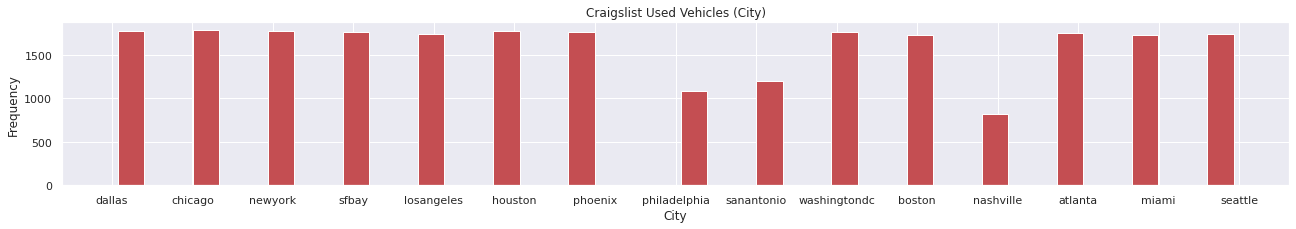

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(22,3))
# plot histogram
ax.hist(dfq['city'],rwidth=0.7,bins=30)
# set title and labels
ax.set_title('Craigslist Used Vehicles (City)')
ax.set_xlabel('City')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

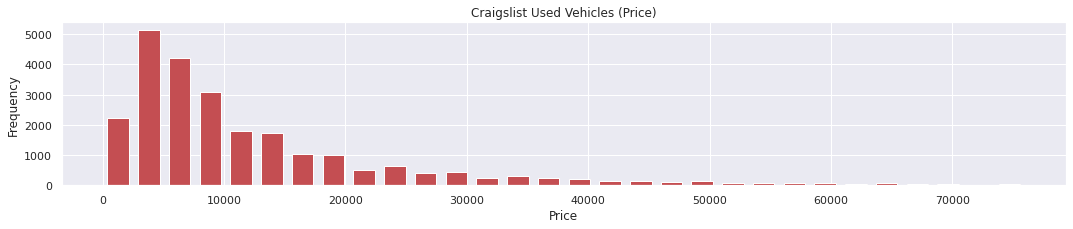

In [ ]:
# remove outliers in price
q = dfs["price"].quantile(0.99)
dfq = dfs[dfs["price"] < q]

fig, ax = plt.subplots(1,1,figsize=(18,3))
# plot histogram
ax.hist(dfq['price'],rwidth=0.7,bins=30)
# set title and labels
ax.set_title('Craigslist Used Vehicles (Price)')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')


In [ ]:
# dfq.loc[df['city'] == "atlanta"]

Text(0, 0.5, 'Frequency')

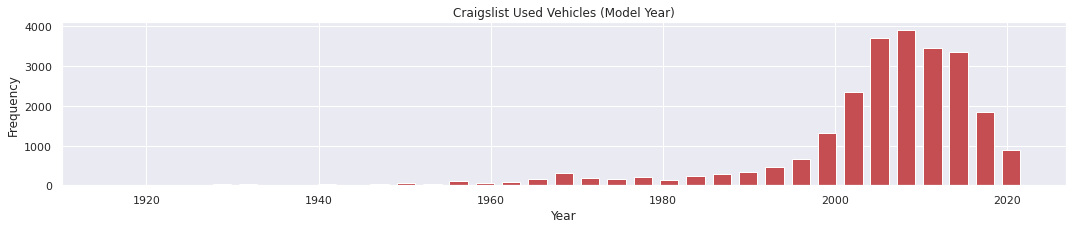

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,3))
# plot histogram
ax.hist(dfs['year'],rwidth=0.7,bins=35)
# set title and labels
ax.set_title('Craigslist Used Vehicles (Model Year)')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')


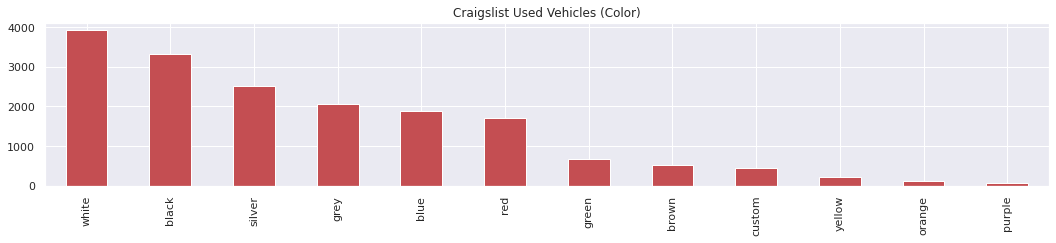

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,3))

df[df['paint color'].notna()]['paint color'].value_counts(sort = True).plot.bar(title='Craigslist Used Vehicles (Color)')

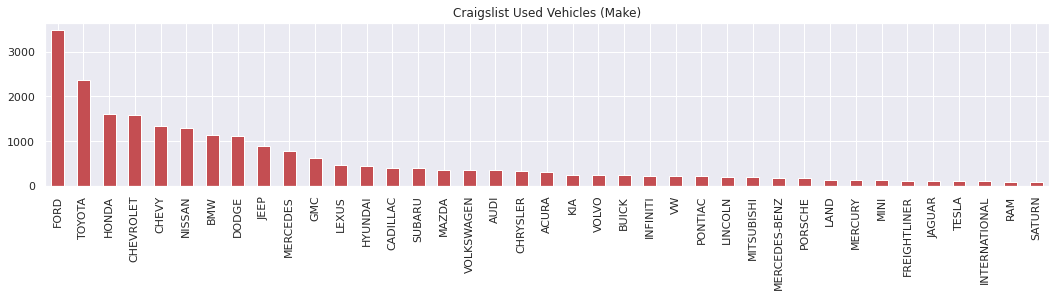

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,3))

df['make'].value_counts(sort = True)[:39].plot.bar(title='Craigslist Used Vehicles (Make)')

Text(0, 0.5, 'Frequency')

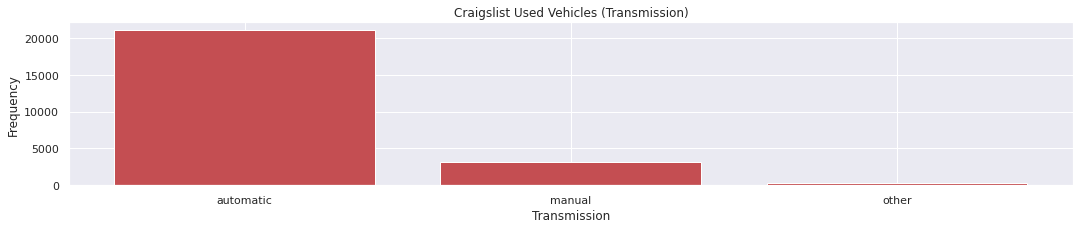

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,3)) 
# count the occurrence of each class 
data = dfs['transmission'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Craigslist Used Vehicles (Transmission)') 
ax.set_xlabel('Transmission') 
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

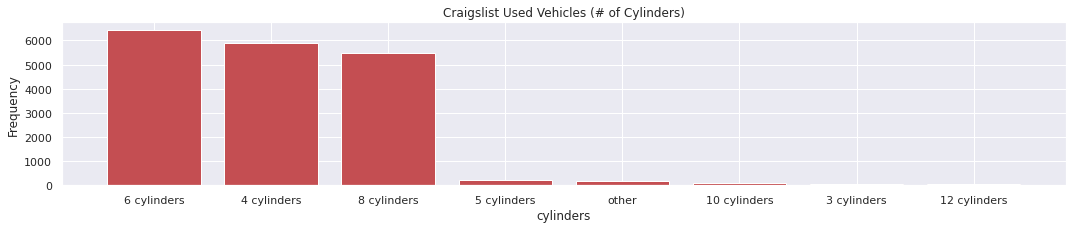

In [ ]:
# fig, ax = plt.subplots() 
fig, ax = plt.subplots(1,1,figsize=(18,3))
# count the occurrence of each class 
data = dfs['cylinders'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Craigslist Used Vehicles (# of Cylinders)') 
ax.set_xlabel('cylinders') 
ax.set_ylabel('Frequency')

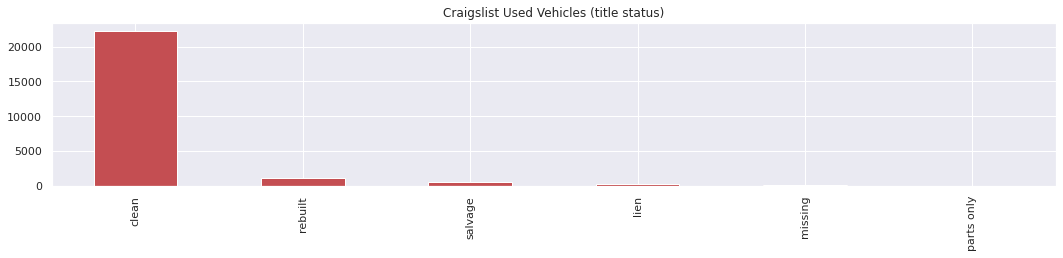

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,3))

df['title status'].value_counts(sort = True)[:39].plot.bar(title='Craigslist Used Vehicles (title status)')

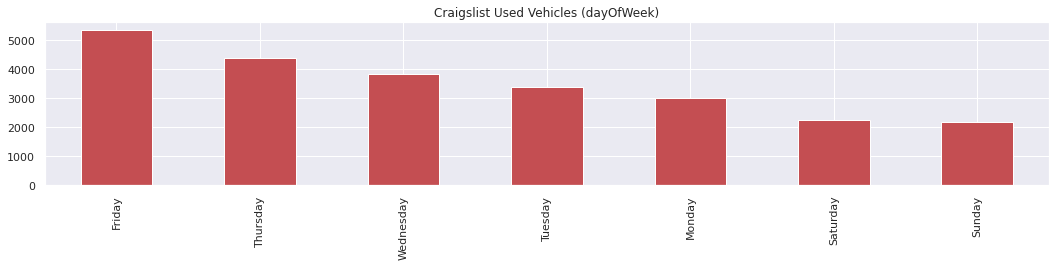

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,3))

df['dayOfWeek'].value_counts(sort = True)[:39].plot.bar(title='Craigslist Used Vehicles (dayOfWeek)')

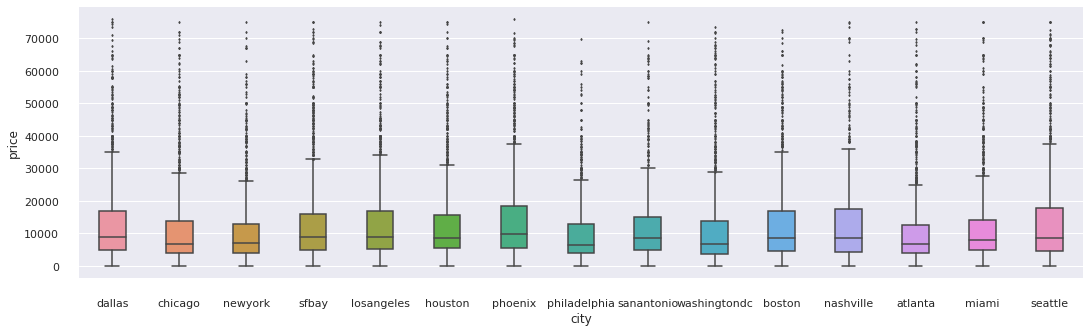

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,5))
sns.boxplot(x="city", y="price", data=dfq, width=0.4, fliersize=1.5)
sns.despine(offset=10, trim=True)

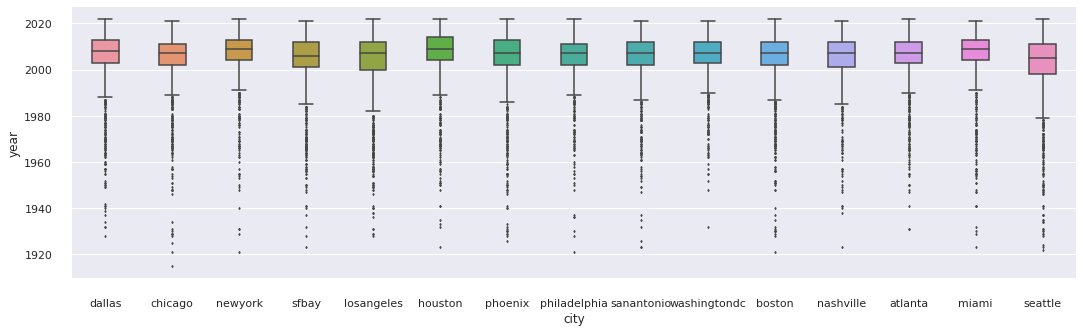

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,5))
sns.boxplot(x="city", y="year", data=dfq, width=0.4, fliersize=1.5)
sns.despine(offset=10, trim=True)

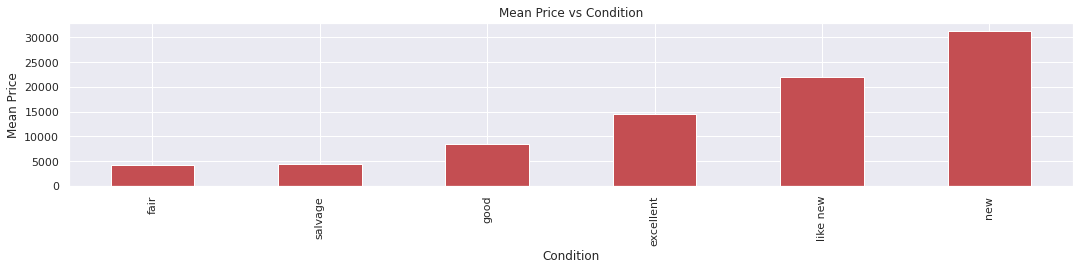

In [ ]:

dfg = dfq.groupby(['condition'])['price'].mean().sort_values()
dfg.plot(kind='bar', title='Mean Price vs Condition', ylabel='Mean Price',
         xlabel='Condition', figsize=(18,3))


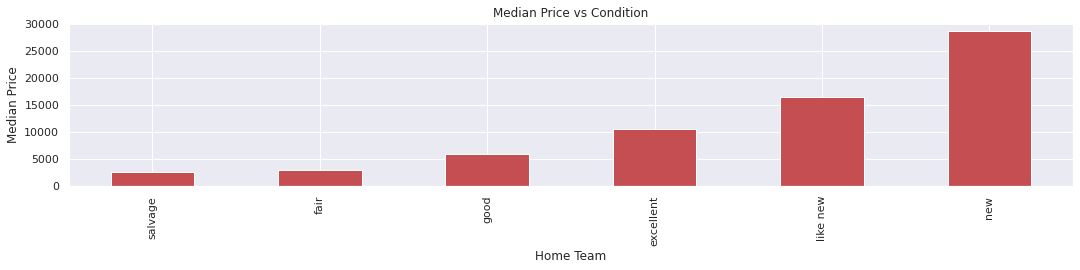

In [ ]:
dfg = dfq.groupby(['condition'])['price'].median().sort_values()
dfg.plot(kind='bar', title='Median Price vs Condition', ylabel='Median Price',
         xlabel='Home Team', figsize=(18,3))

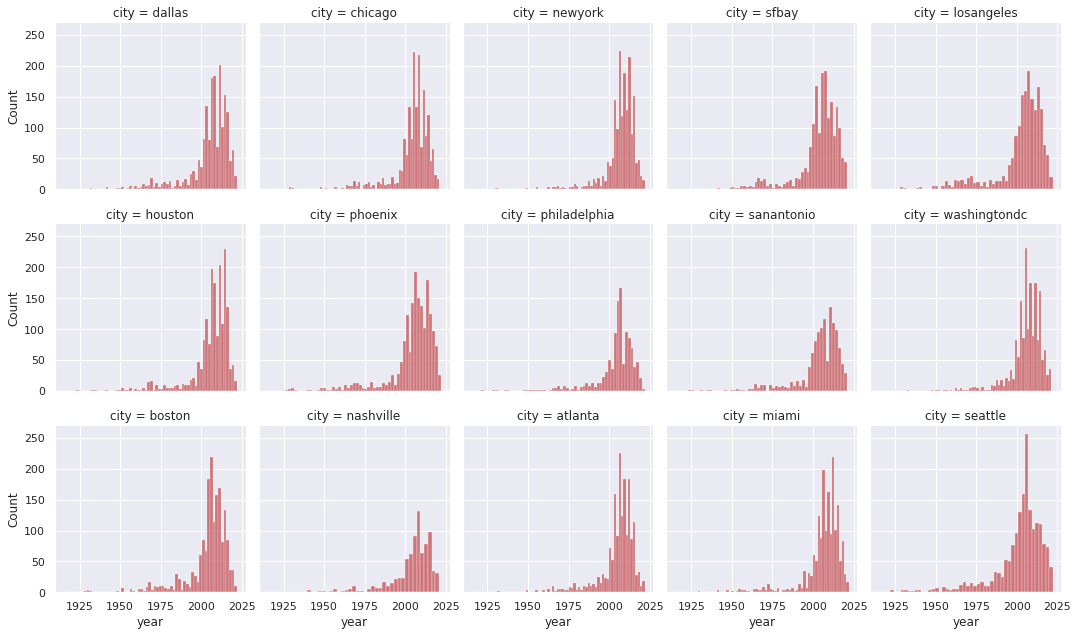

In [ ]:
g = sns.FacetGrid(df, col="city", col_wrap=5)
g.map(sns.histplot, "year")

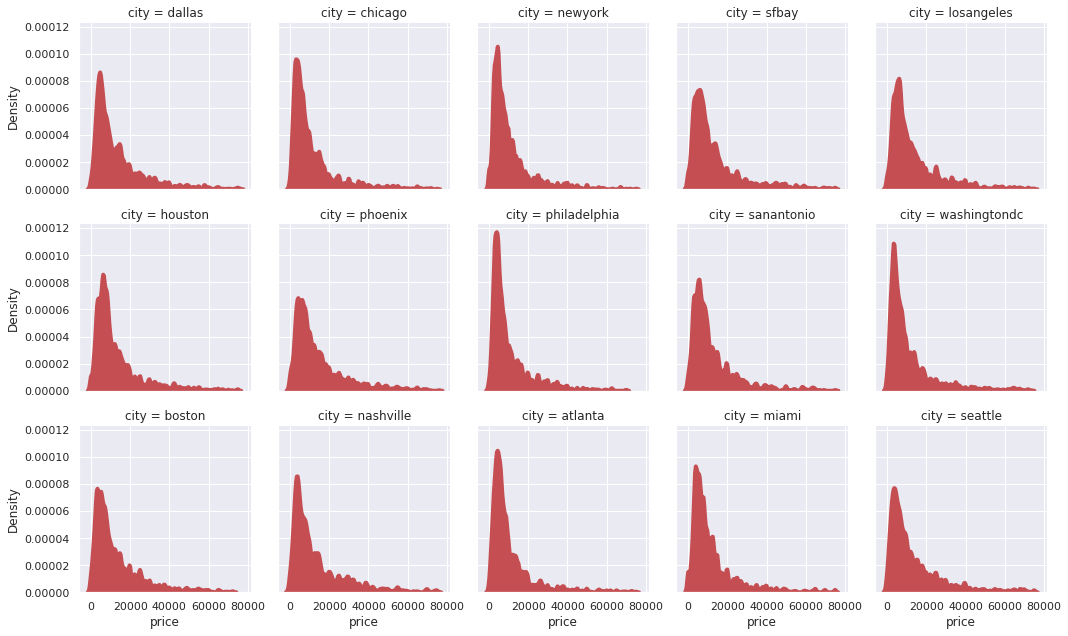

In [ ]:
g = sns.FacetGrid(dfq, col="city", col_wrap=5)
g.map(sns.kdeplot, "price", shade=True, alpha=1, lw=1.5, bw_adjust=0.2)
g.map(sns.kdeplot, "price", lw=4, bw_adjust=0.2)

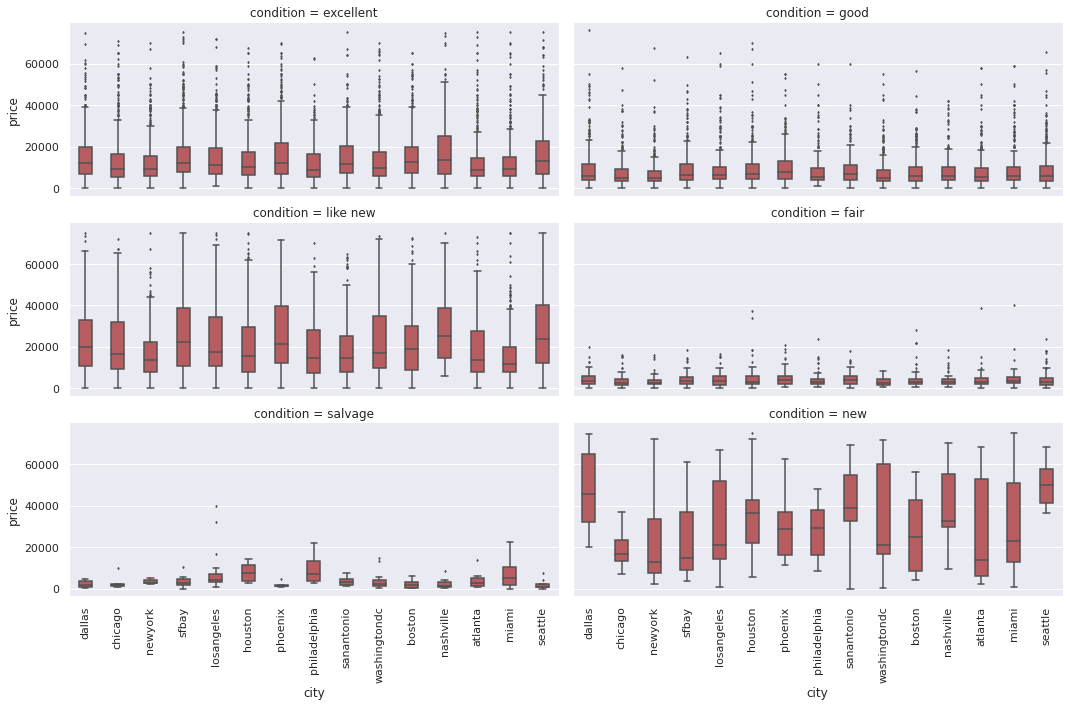

In [ ]:
g = sns.FacetGrid(dfq, col="condition", col_wrap=2, height=3, aspect=2.5)

g.map(sns.boxplot, "city", "price",order=['dallas','chicago', 'newyork', 'sfbay', 'losangeles', \
        'houston', 'phoenix', 'philadelphia', 'sanantonio', 'washingtondc',\
       'boston', 'nashville', 'atlanta', 'miami', 'seattle'], width=0.4, fliersize=1.5)
g.set_xticklabels(rotation=90)

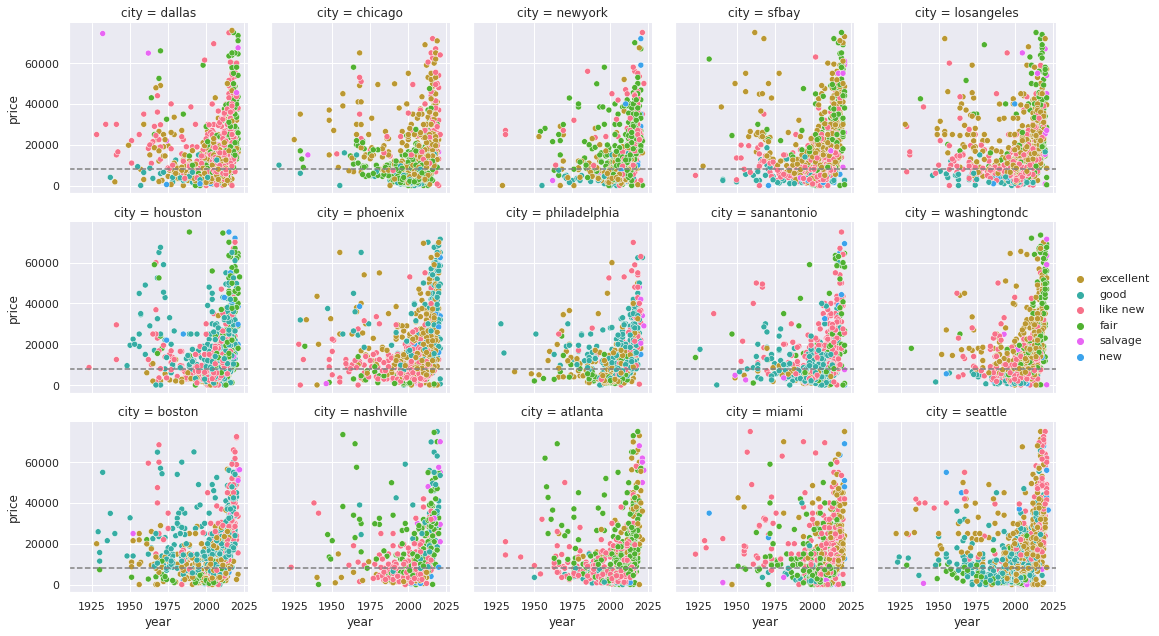

In [ ]:
g = sns.FacetGrid(dfq, col="city", col_wrap=5)
g.map_dataframe(sns.scatterplot, x="year", y="price", hue="condition")
g.refline(y=dfq["price"].median())
g.add_legend()

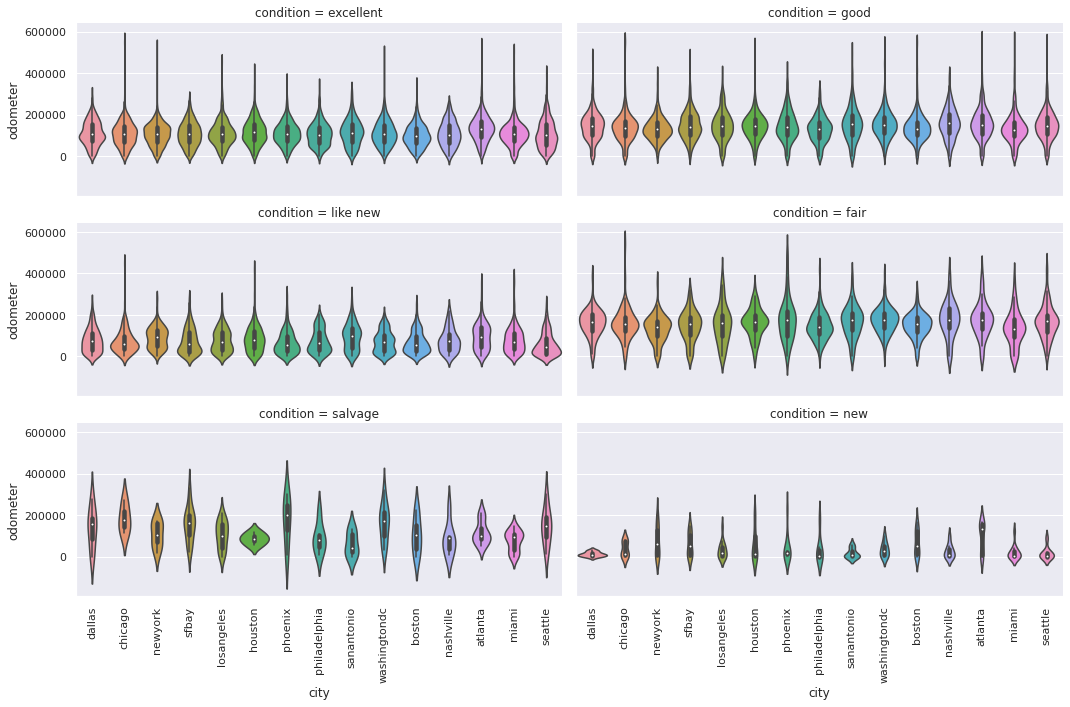

In [ ]:
# remove outliers in odometer
r = dfq["odometer"].quantile(0.99)
dfr = dfq[dfq["odometer"] < r]

g = sns.catplot(x="city", y="odometer", col="condition",
                data=dfr, kind="violin",col_wrap=2,
                height=3, aspect=2.5, width=0.9, fliersize=1.5);
g.set_xticklabels(rotation=90)

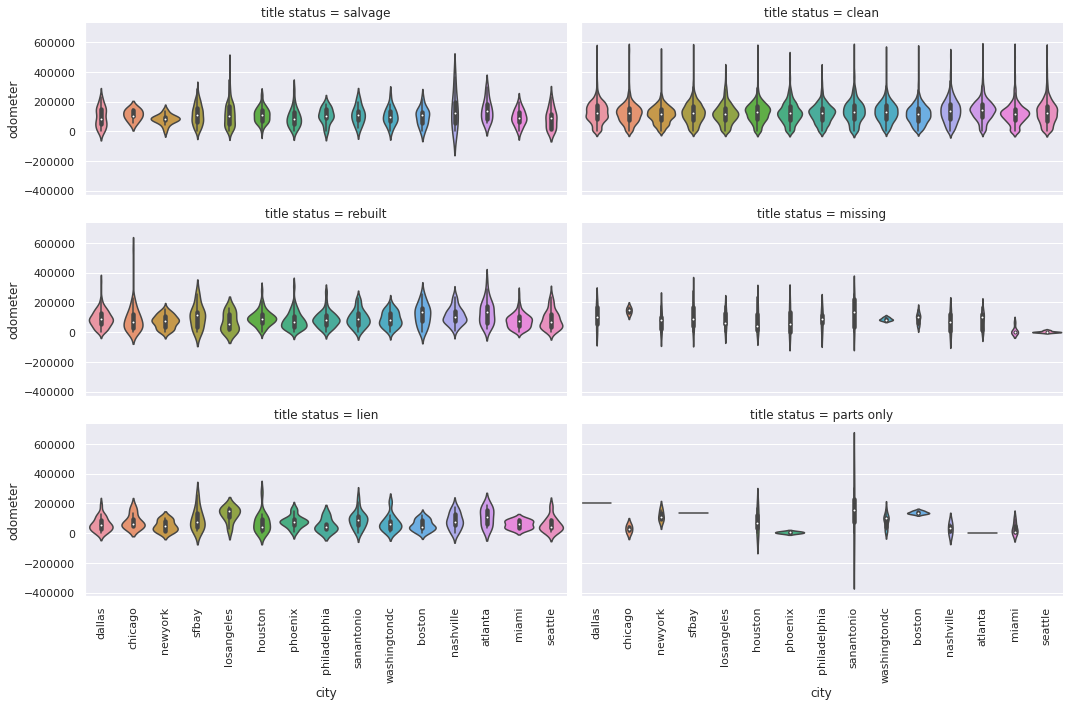

In [ ]:
g = sns.catplot(x="city", y="odometer", col="title status",
                data=dfr, kind="violin",col_wrap=2,
                height=3, aspect=2.5, width=0.9, fliersize=1.5);
g.set_xticklabels(rotation=90)

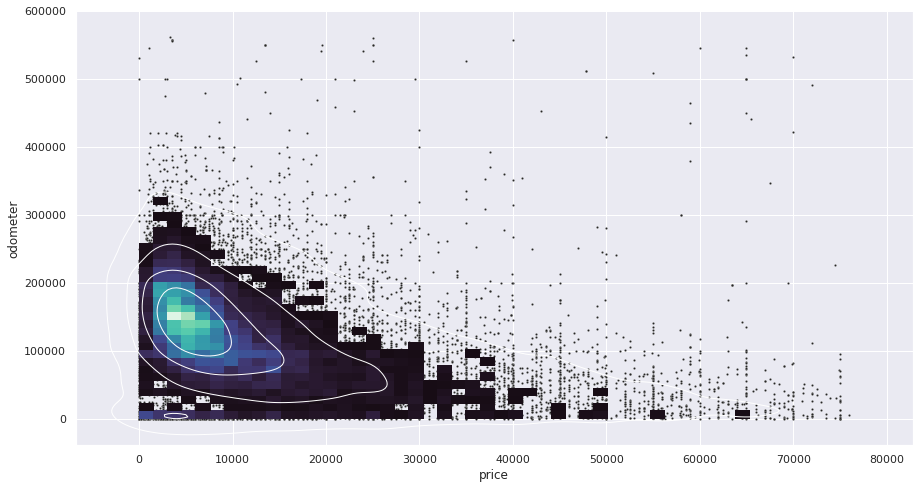

In [ ]:
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='price', y='odometer', s=5, color=".15", data=dfr)
sns.histplot(x='price', y='odometer', bins=50, pthresh=.1, cmap="mako", data=dfr)
sns.kdeplot(x='price', y='odometer', levels=5, color="w", linewidths=1, data=dfr)

In [ ]:
dfq.columns

Index(['VIN', 'city', 'condition', 'cylinders', 'date time', 'drive', 'fuel',
       'lat', 'long', 'odometer', 'pID', 'paint color', 'post_body', 'price',
       'size', 'title status', 'transmission', 'type', 'year make model',
       'year_c make model', 'year', 'make', 'model', 'date', 'time', 'weekday',
       'dayOfWeek'],
      dtype='object')

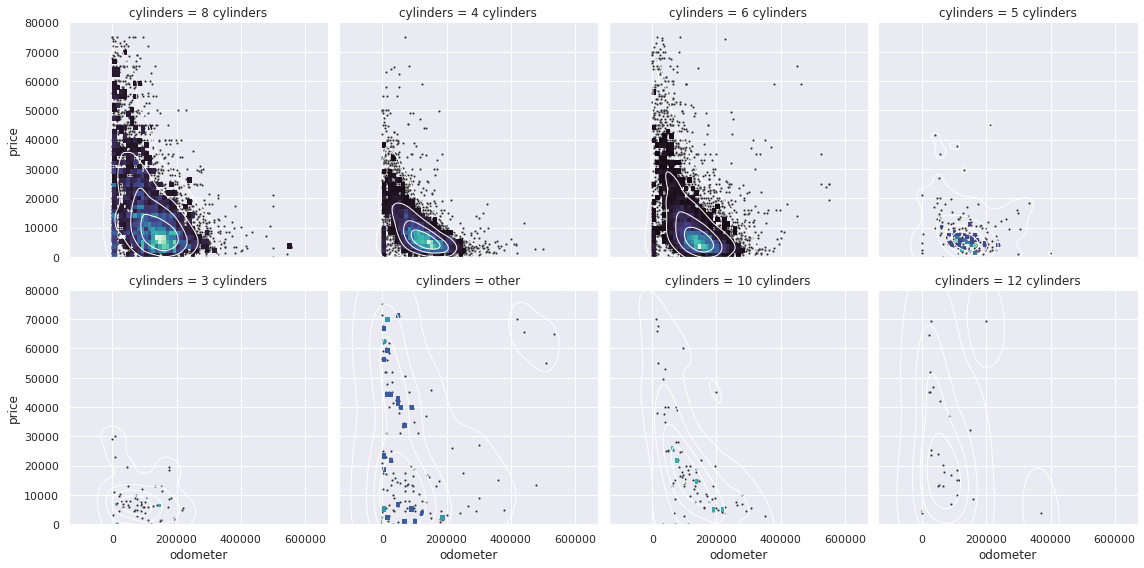

In [ ]:
g = sns.FacetGrid(dfr, col="cylinders", col_wrap=4, height=4, ylim=(0, 80000))
g.map(sns.scatterplot, "odometer", "price", s=5, color=".15")
g.map(sns.histplot, "odometer", "price", bins=50, pthresh=.1, cmap="mako")
g.map(sns.kdeplot, "odometer", "price", levels=5, color="w", linewidths=1)

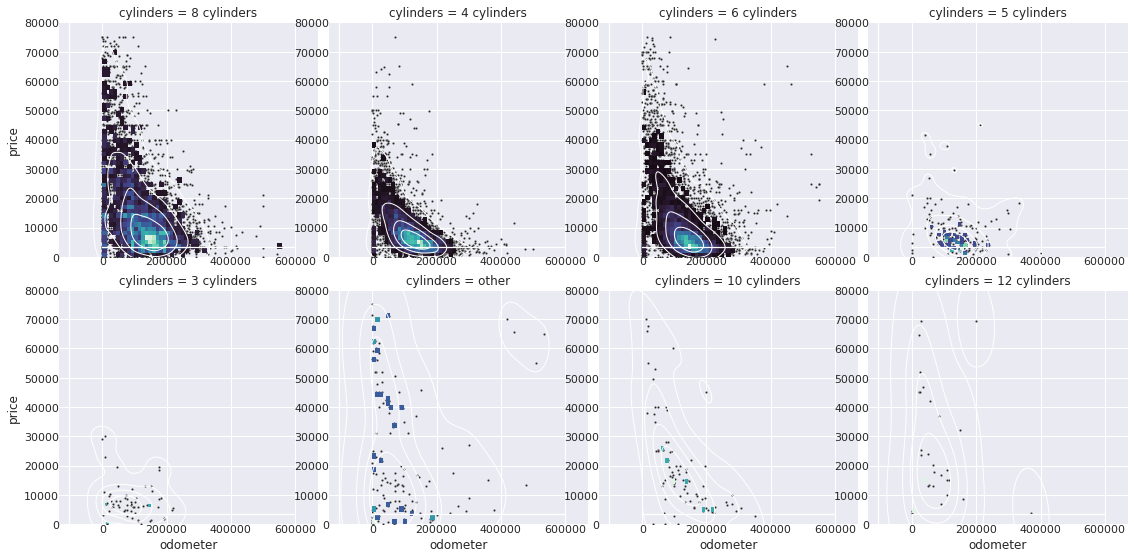

In [ ]:
g = sns.FacetGrid(dfr, col="cylinders", col_wrap=4, height=4, ylim=(0, 80000))
g.map(sns.scatterplot, "odometer", "price", s=5, color=".15")
g.map(sns.histplot, "odometer", "price", bins=50, pthresh=.1, cmap="mako")
g.map(sns.kdeplot, "odometer", "price", levels=5, color="w", linewidths=1)
sns.despine(offset=-10, trim=True)

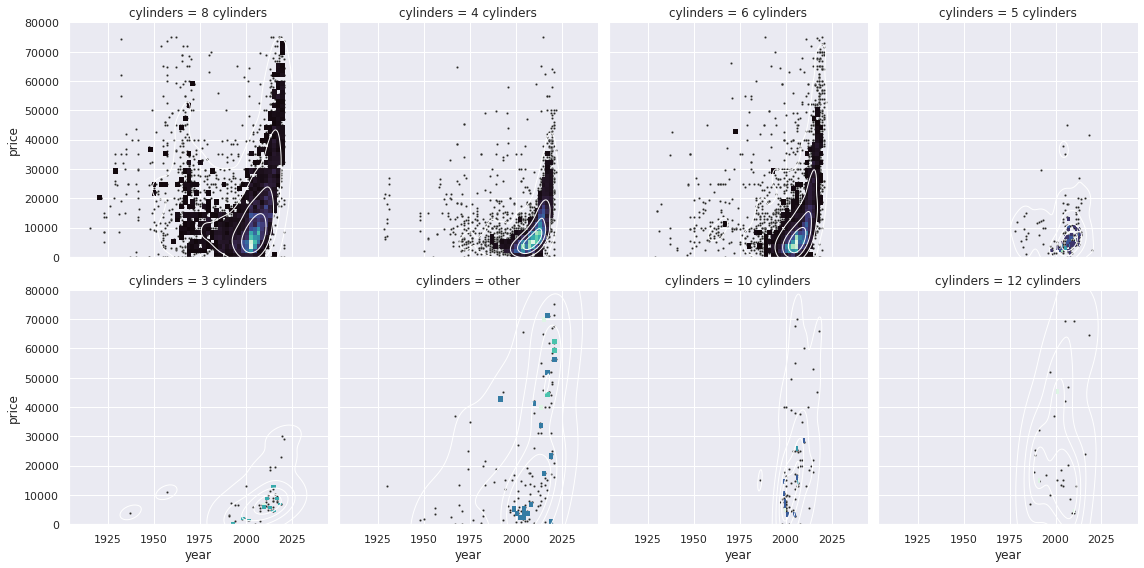

In [ ]:
g = sns.FacetGrid(dfr, col="cylinders", col_wrap=4, height=4, ylim=(0, 80000))
g.map(sns.scatterplot, "year", "price", s=5, color=".15")
g.map(sns.histplot, "year", "price", bins=50, pthresh=.1, cmap="mako")
g.map(sns.kdeplot, "year", "price", levels=5, color="w", linewidths=1)

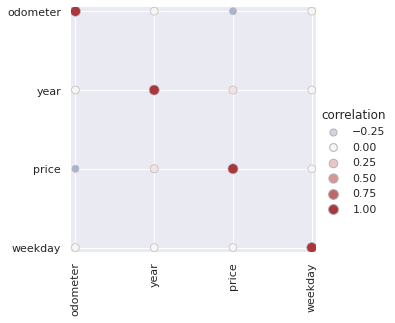

In [ ]:
# Compute a correlation matrix and convert to long-form
corr_mat = dfr[['cylinders','odometer', 'year', 'price', 'weekday']].dropna().corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=5, sizes=(50, 100), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [ ]:
# Categorical labels

test=dfr

temp = test[[ 'condition', 'cylinders', 'drive', 'fuel',
       'paint color', 'size', 'title status', 'transmission', 'type', 'make']].apply(lambda col:pd.Categorical(col).codes)
test = pd.concat([test, temp],axis=1)
print(test.shape, dfr.shape)
test.head(3)

,VIN,city,condition_0,cylinders_0,date time,drive_0,fuel_0,lat,long,odometer,pID,paint color_0,post_body,price,size_0,title status_0,transmission_0,type_0,year make model,year_c make model,year,make_0,model,date,time,weekday,dayOfWeek,condition_1,cylinders_1,drive_1,fuel_1,paint color_1,size_1,title status_1,transmission_1,type_1,make_1
0,NaN,dallas,excellent,8 cylinders,2021-10-15 23:08:00,fwd,gas,32.825721,-97.481600,2200,7.385199e+09,black,Navigator L Nice n clean With navigation syste...,5200,full-size,salvage,automatic,SUV,2007 Lincoln navigator,2007 Lincoln navigator,2007.0,LINCOLN,NAVIGATOR,2021-09-24,23:08,4,Friday,0,6,1,2,0,1,5,0,0,363
1,KL8CB6SA9HC828034,dallas,good,4 cylinders,2021-10-15 23:05:00,fwd,gas,32.748117,-97.076575,105119,7.385198e+09,grey,Won t last long,3250,compact,clean,automatic,NaN,2017 chevy spark ls,2017 chevy spark ls,2017.0,CHEVY,SPARK,2021-09-24,23:05,4,Friday,2,3,1,2,5,0,0,0,-1,174
2,NaN,dallas,NaN,NaN,2021-10-15 22:53:00,NaN,gas,32.604100,-96.865300,131913,7.385196e+09,NaN,Am Selling MY Beautiful 2010 Nissan Xterra In ...,6950,NaN,clean,automatic,NaN,2010 Nissan Xterra SE 4x4,2010 Nissan Xterra SE 4x4,2010.0,NISSAN,XTERRA,2021-09-24,22:53,4,Friday,-1,-1,-1,2,-1,-1,0,0,-1,428


In [ ]:
# Rename duplicate columns

from collections import defaultdict

renamer = defaultdict()

for column_name in test.columns[test.columns.duplicated(keep=False)].tolist():
    if column_name not in renamer:
        renamer[column_name] = [column_name+'_0']
    else:
        renamer[column_name].append(column_name +'_'+str(len(renamer[column_name])))

# print(renamer)
defaultdict(None, {'b': ['b_0', 'b_1', 'b_2', 'b_3'], 'c': ['c_0', 'c_1']})


test.rename(
    columns=lambda column_name: renamer[column_name].pop(0)
    if column_name in renamer 
    else column_name , inplace=True
)
   

In [ ]:
test.columns

Index(['VIN', 'city', 'condition_0', 'cylinders_0', 'date time', 'drive_0',
       'fuel_0', 'lat', 'long', 'odometer', 'pID', 'paint color_0',
       'post_body', 'price', 'size_0', 'title status_0', 'transmission_0',
       'type_0', 'year make model', 'year_c make model', 'year', 'make_0',
       'model', 'date', 'time', 'weekday', 'dayOfWeek', 'condition_1',
       'cylinders_1', 'drive_1', 'fuel_1', 'paint color_1', 'size_1',
       'title status_1', 'transmission_1', 'type_1', 'make_1'],
      dtype='object')

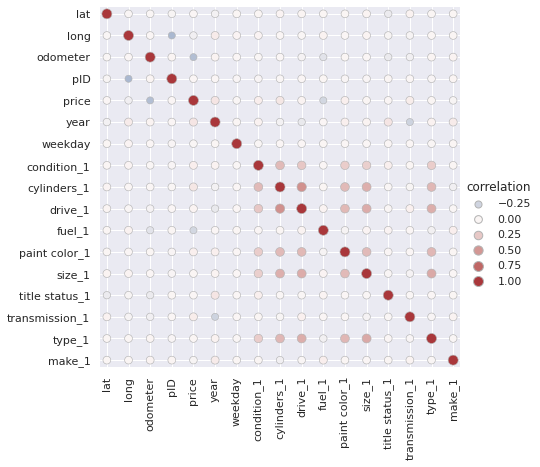

In [ ]:
# Compute a correlation matrix and convert to long-form
corr_mat = test.select_dtypes(include=np.number).dropna().corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette='vlag', hue_norm=(-1, 1), edgecolor=".7",
    height=7, sizes=(50, 100), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

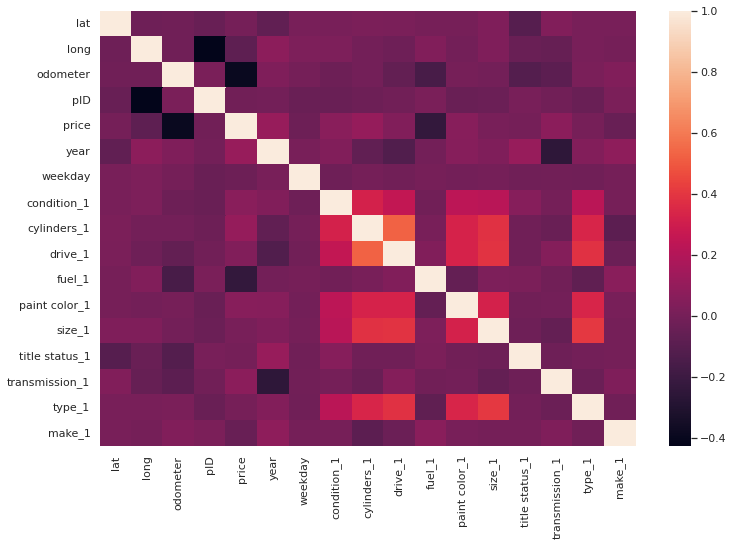

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(test.select_dtypes(include=np.number).corr())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


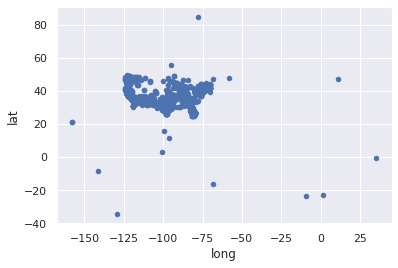

In [ ]:
# !pip install geopandas

import geopandas as gpd
dfq.plot(x="long", y="lat", kind="scatter")